讀取圖片並轉為灰階

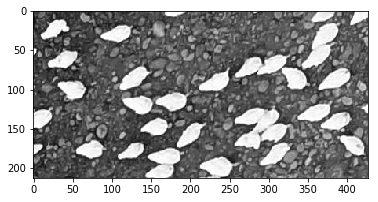

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import naive_bayes
from sklearn import covariance
import cv2
%matplotlib inline
duck=cv2.imread('duck.jpg')
duck=cv2.cvtColor(duck,cv2.COLOR_RGB2GRAY)
plt.imshow(duck,cmap='gray')

將較不白的點設為黑色

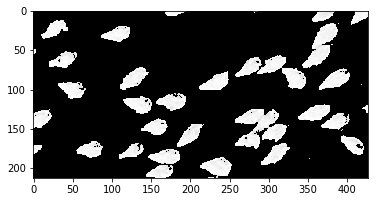

In [3]:
for i in range(213):
    for j in range(427): 
        if duck[i][j]<=220: duck[i][j]=0
plt.imshow(duck,cmap='gray')

利用處理完的圖片標記label,丟入bayesian訓練

In [4]:
y_train=np.zeros((213,427))
for i in range(213):
    for j in range(427):
        if duck[i][j]>0:
            y_train[i][j]=1
y_train=np.reshape(y_train,(213*427))
duck=np.reshape(duck,(213*427,1))
bayesian=sklearn.naive_bayes.GaussianNB(priors=(0.5,0.5))
x_train=cv2.imread('duck.jpg')
x_train=cv2.cvtColor(x_train,cv2.COLOR_RGB2GRAY)
x_train=np.reshape(x_train,(213*427,1))
bayesian.fit(x_train,y_train)

GaussianNB(priors=(0.5, 0.5), var_smoothing=1e-09)

In [26]:
x_train.shape

(90951, 1)

處理fullduck

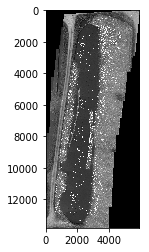

In [5]:
fullduck=cv2.imread('full_duck.jpg')
fullduck=cv2.cvtColor(fullduck,cv2.COLOR_RGB2GRAY)
plt.imshow(fullduck,cmap='gray')
fullduck=np.reshape(fullduck,(13816*5946,1))
#fullduck=np.reshape(fullduck,(99*153,1))

利用classifier預測fullduck

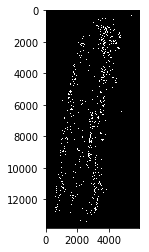

In [5]:
result=bayesian.predict(fullduck)
result=np.reshape(result,(13816,5946))
for i in range(13816):
    for j in range(5946):
        if result[i][j]>0:
            result[i][j]=240
plt.imshow(result,cmap='gray')

In [6]:
cv2.imwrite('output.jpg', result)

True

NameError: name 'result' is not defined